# Intro

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Basic Syntax and Line Graphs

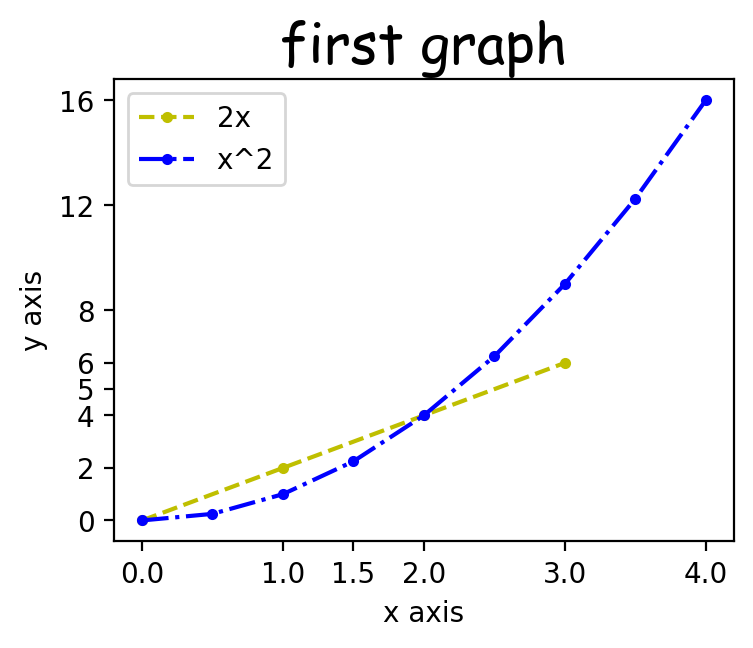

In [2]:
# Simple line graph
x = [0,1,2,3]
y = [0,2,4,6]
# resize graph
plt.figure(figsize = (4,3), dpi = 200)

# plt.plot(x,y, label='2x', color = 'yellow', linewidth = '4', linestyle = '-.', marker = '.', markersize = '15', markeredgecolor = 'black')
# shorthand notation [color][marker][line]
plt.plot(x,y, 'y.--',label='2x')

# line number 2 
x2 = np.arange(0,4.5, 0.5)
plt.plot(x2, x2**2, 'b.-.', label = 'x^2')

# to show title
plt.title('first graph', fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel('x axis')
plt.ylabel('y axis')

# To add your own x and y ticks
plt.xticks([0,1,1.5,2,3,4])
plt.yticks([0,2,4,5,6,8,12,16])

plt.legend()

plt.savefig('my first graph.png', dpi = 300)

plt.show() # to get rid of below line we do plt.show

## Bar Chart

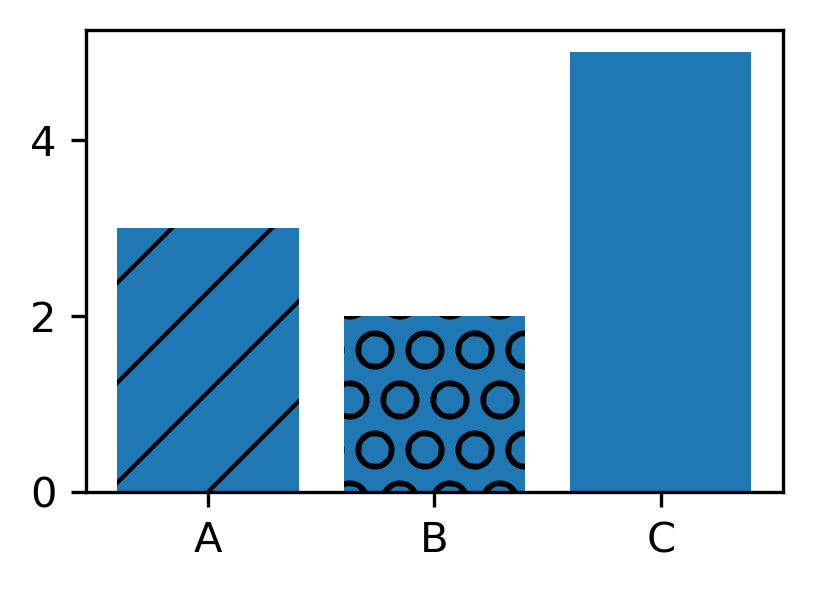

In [3]:
labels = ['A', 'B', 'C']
values = [3,2,5]

plt.figure(figsize = (3,2), dpi = 300)

# plt.bar(labels, values)

# to give hatch values to the bars
# bars = plt.bar(labels, values)
# bars[0].set_hatch('/')
# bars[1].set_hatch('o')

# for many bars 
bars = plt.bar(labels, values)
patterns = ['/', 'O', '']
for bar in bars: 
    bar.set_hatch(patterns.pop(0))

plt.show()

In [4]:
pok = pd.read_csv('pokemon_data.csv')
pok

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


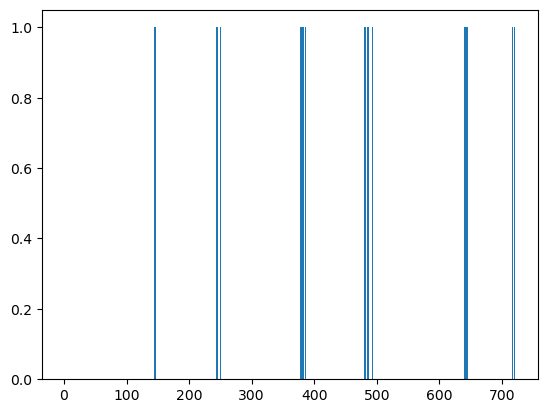

In [21]:
plt.bar(pok['#'], pok.Legendary)
plt.show()

## Plotting a real world example

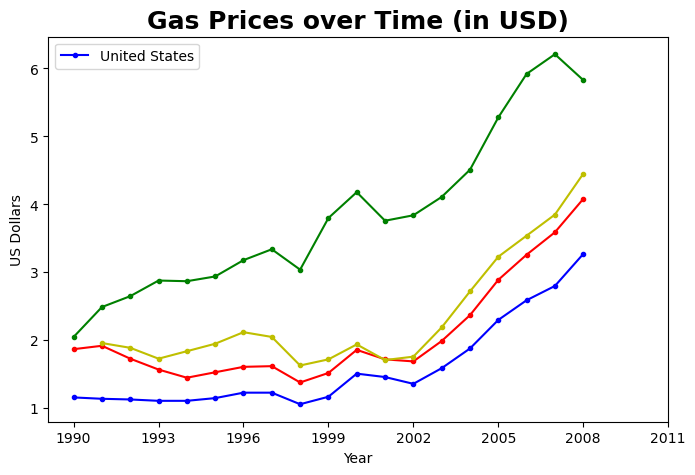

In [6]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8,5))

plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(gas.Year, gas.USA, 'b.-', label='United States')
plt.plot(gas.Year, gas.Canada, 'r.-')
plt.plot(gas.Year, gas['South Korea'], 'g.-')
plt.plot(gas.Year, gas.Australia, 'y.-')

# Another Way to plot many values!
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for country in gas:
#     if country in countries_to_look_at:
#         plt.plot(gas.Year, gas[country], marker='.')

plt.xticks(gas.Year[::3].tolist()+[2011])

plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.legend()

plt.savefig('Gas_price_figure.png', dpi=300)

plt.show()

## Histograms

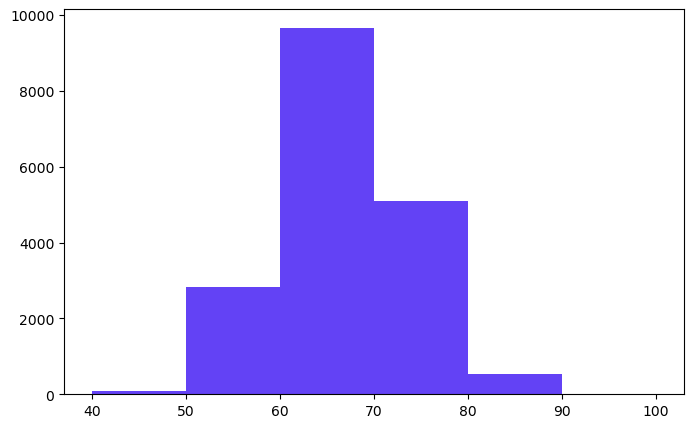

In [29]:
fifa = pd.read_csv('fifa_data.csv')
bins = [40,50,60,70,80,90,100]

plt.figure(figsize=(8,5))

plt.hist(fifa.Overall, bins=bins, color='#6342f5')

plt.xticks(bins)
plt.show()

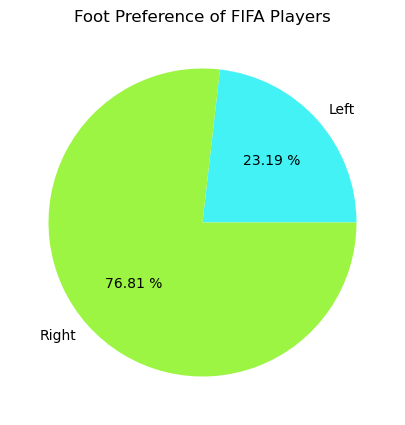

In [28]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

plt.figure(figsize=(8,5))

labels = ['Left', 'Right']
colors = ['#42f2f5', '#9bf542']

plt.pie([left, right], labels = labels, colors=colors, autopct='%.2f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

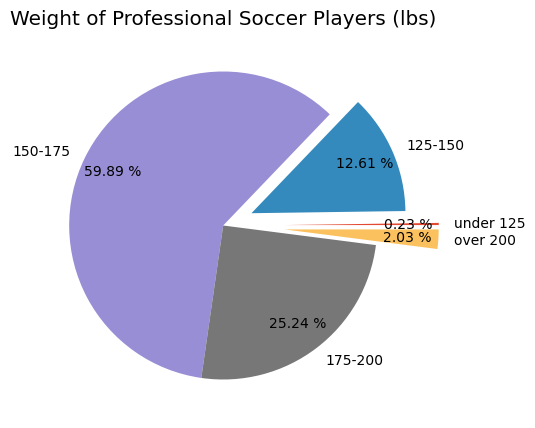

In [30]:
plt.figure(figsize=(8,5), dpi=100)

plt.style.use('ggplot')

fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']
explode = (.4,.2,0,0,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

plt.pie(weights, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

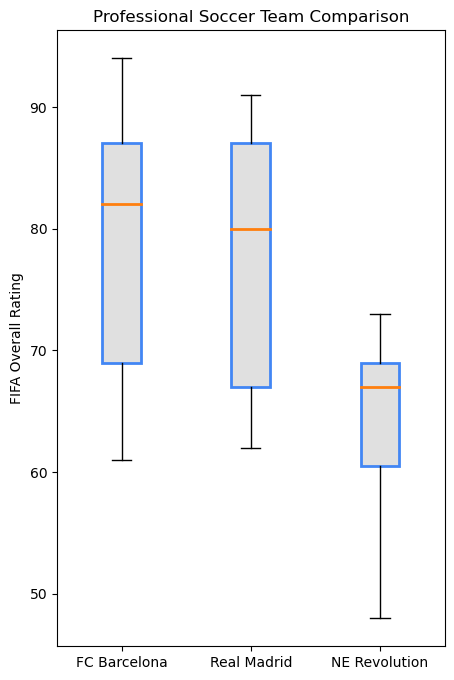

In [31]:
plt.figure(figsize=(5,8), dpi=100)

plt.style.use('default')

barcelona = fifa.loc[fifa.Club == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
revs = fifa.loc[fifa.Club == "New England Revolution"]['Overall']

#bp = plt.boxplot([barcelona, madrid, revs], labels=['a','b','c'], boxprops=dict(facecolor='red'))
bp = plt.boxplot([barcelona, madrid, revs], labels=['FC Barcelona','Real Madrid','NE Revolution'], patch_artist=True, medianprops={'linewidth': 2})

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    #box.set(hatch = '/')
    
plt.show()